# 챗GPT 활용하여 네이버 연관검색어 크롤링하기

- 참고 유튜브 [김왼손의 왼손코딩](https://youtu.be/WwR21ZPYl44?feature=shared)

# 네이버에서 검색된 단어에 대한 연관검색어 정보 수집하기.
- 사용법이 쉬운 파이썬 패키지 3개를 장단점과 함께 소개해 달라고 요청함

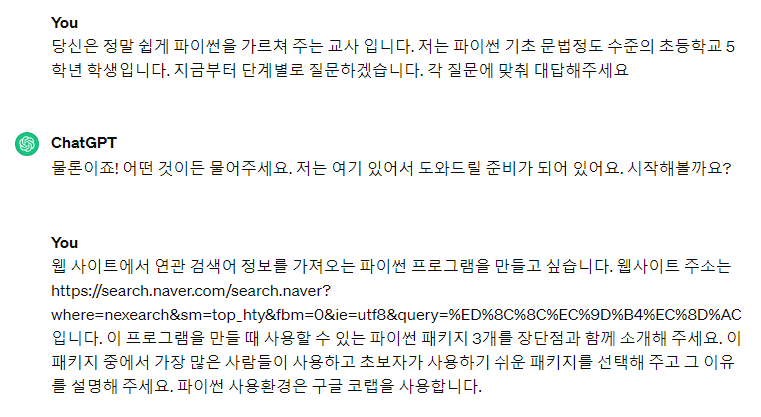

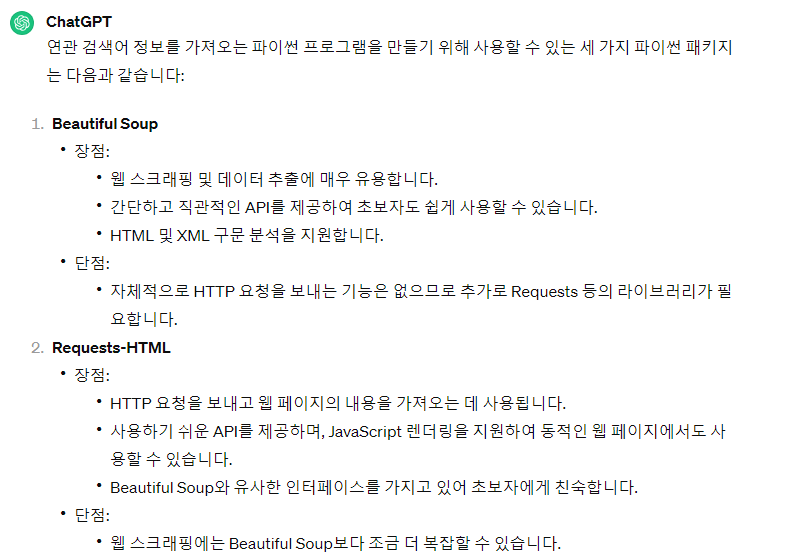

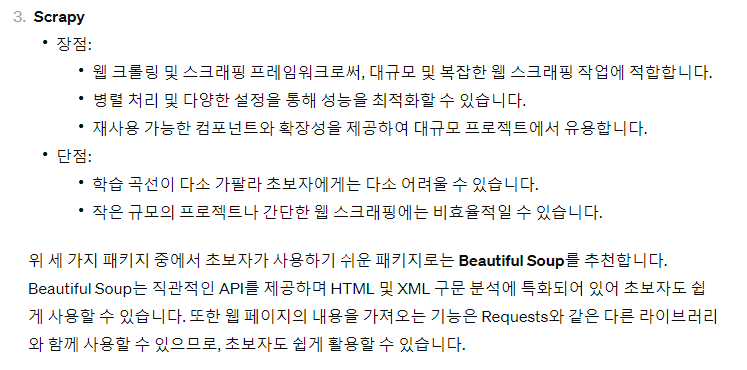

## 챗GPT는 Beautiful Soup을 추천해줌

### 나에게는 설명이 안나왔지만 강사님에게는 이렇게 설명을 해줌 -_-;

- requests.get(url) 은 지정된 URL에 GET 요청을 보내고 내용을 가져온다.
- BeautifulSoup(response.text, 'html.parser')은 새로운 BeautifulSoup 객체를 만들고 응답 내용을 구문 분석합니다.
- soup.find_all(class_="keyword")는 클래스 이름이 "keyword"인 모든 요소를 찾는다.
- 그런다음 찾은 각 용어를 반복하고 텍스트 내용을 인쇄한다.




---



In [1]:
import requests  # 웹 페이지 요청을 위한 라이브러리
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리

def get_related_keywords(url, target_class):
    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 연관 검색어를 담을 리스트 초기화
    related_keywords = []

    # 웹 페이지에서 해당 클래스를 가진 모든 요소를 찾기
    keyword_elements = soup.find_all(class_=target_class)

    # 연관 검색어가 포함된 HTML 요소가 없는 경우를 대비하여 처리
    if keyword_elements:
        # 각 요소에서 텍스트 추출하여 리스트에 추가하기
        for element in keyword_elements:
            related_keywords.append(element.get_text())

    return related_keywords

# 검색할 웹 사이트 URL
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%ED%8C%8C%EC%9D%B4%EC%8D%AC"
# 검색할 클래스
target_class = "keyword"

# 키워드를 이용하여 연관 검색어 가져오기
related_keywords = get_related_keywords(url, target_class)

# 가져온 연관 검색어 출력하기
if related_keywords:
    print("연관 검색어:")
    for idx, keyword in enumerate(related_keywords, 1):
        print(f"{idx}. {keyword}")
else:
    print("연관 검색어를 가져올 수 없습니다.")


연관 검색어:
1.  파이썬 독학 
2.  파이썬 자격증 
3.  파이썬 기초 
4.  두근두근 파이썬 
5.  파이썬 책 
6.  점프투파이썬 
7.  혼자 공부하는 파이썬 
8.  파이썬 설치 
9.  파이썬 뜻 
10.  파이썬 코딩 


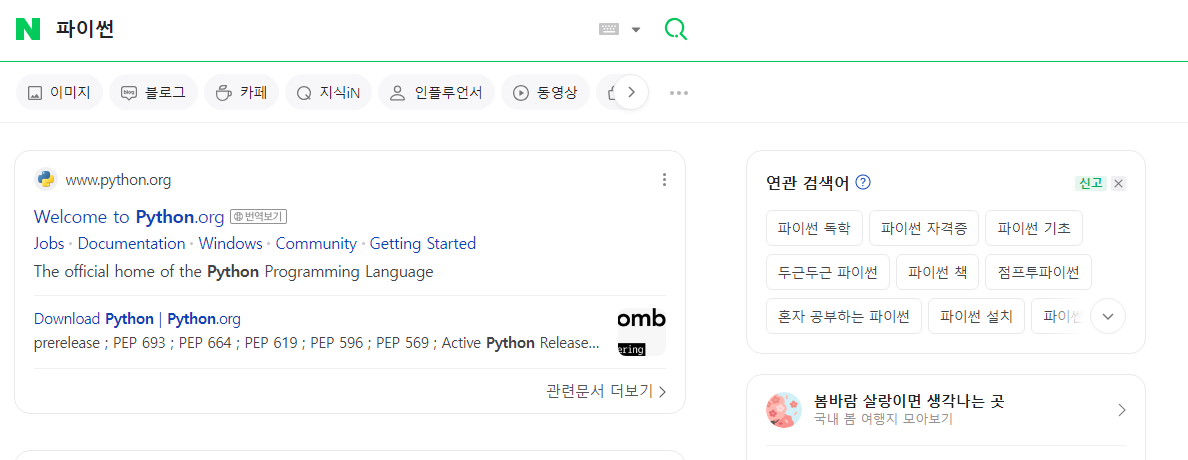

- 연관 검색어에 나오는 정보 잘 가져오는거 확인함ㅋㅋ



---



# 내가 원하는 단어로 검색해보기

In [3]:
import requests  # 웹 페이지 요청을 위한 라이브러리
from bs4 import BeautifulSoup  # HTML 파싱을 위한 라이브러리

def get_related_keywords(keyword):
    # 검색할 웹 사이트 URL 생성
    url = f"https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query={keyword}"

    # HTTP GET 요청을 보내서 웹 페이지 가져오기
    response = requests.get(url)

    # 응답 받은 데이터를 파싱하기
    soup = BeautifulSoup(response.text, 'html.parser')

    # 연관 검색어를 담을 리스트 초기화
    related_keywords = []

    # 연관 검색어가 포함된 HTML 요소를 찾아서 추출하기
    related_elements = soup.find_all('ul', class_='lst_related_srch')

    # 연관 검색어가 포함된 HTML 요소가 없는 경우를 대비하여 처리
    if related_elements:
        # 각 연관 검색어를 추출하여 리스트에 추가하기
        for item in related_elements[0].find_all('li'):
            related_keywords.append(item.get_text())

    return related_keywords

# 사용자로부터 검색할 키워드 입력 받기
keyword = input("검색할 키워드를 입력하세요: ")

# 검색어를 이용하여 연관 검색어 가져오기
related_keywords = get_related_keywords(keyword)

# 가져온 연관 검색어 출력하기
if related_keywords:
    print("연관 검색어:")
    for idx, keyword in enumerate(related_keywords, 1):
        print(f"{idx}. {keyword}")
else:
    print("연관 검색어를 가져올 수 없습니다.")


검색할 키워드를 입력하세요: 라스트 워
연관 검색어:
1.   라스트워 공략  
2.   라스트워 영웅  
3.   라스트워 쿠폰  
4.   라스트워 영웅 조합  
5.   라스트워 서바이벌  
6.   라스트워 영웅 티어  
7.   라스트워 티어  
8.   라스트워 광고  
9.   라스트워 카페  
10.   라스트워 전투력  


- 요즘 내가 푸우우우우우욱 빠져 있는 게임 ㅋㅋㅋ 검색해봄ㅋㅋㅋㅋㅋㅋ